
methods for scoring words; they are:
 binary Where words are marked as present (1) or absent (0).
 count Where the occurrence count for each word is marked as an integer.
 tfidf Where each word is scored based on their frequency, where words that are common
across all documents are penalized.
 freq Where words are scored based on their frequency of occurrence within the document.

In [1]:
import string
import re
from os import listdir
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from pandas import DataFrame
from matplotlib import pyplot

In [2]:
# load doc into memory
def load_doc(filename):
    # open the file as read only
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file
    file.close()
    return text

In [3]:
# turn a doc into clean tokens
def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    
    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    
    # remove punctuation from each word
    tokens = [re_punc.sub('', w) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    
    return tokens

In [4]:
def doc_to_line(filename, vocab):
    # load the doc
    doc = load_doc(filename)
    # clean doc
    tokens = clean_doc(doc)
    # filter by vocab
    tokens = [w for w in tokens if w in vocab]
    return ' '.join(tokens)

In [5]:
# load all docs in a directory
def process_docs(directory, vocab,is_train):
    lines = list()
    # walk through all files in the folder
    for filename in listdir(directory):
        
        # skip any reviews in the test set
        if is_train and filename.startswith('cv9'):
            continue
        if not is_train and not filename.startswith('cv9'):
            continue    
        # create the full path of the file to open
        path = directory + '/' + filename
        # load and clean the doc
        line = doc_to_line(path, vocab)
        # add to list
        lines.append(line)
    return lines

In [6]:
# load and clean a dataset
def load_clean_dataset(vocab,is_train):
    # load documents
    neg = process_docs(r'c:/Download/review_polarity/txt_sentoken/neg', vocab,is_train)
    pos = process_docs(r'c:/Download/review_polarity/txt_sentoken/pos', vocab,is_train)
    docs = neg + pos
    # prepare labels
    labels = [0 for _ in range(len(neg))] + [1 for _ in range(len(pos))]
    return docs, labels

In [7]:
# define the model
def define_model(n_words):
    # define network
    model = Sequential()
    model.add(Dense(50, input_shape=(n_words,), activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # compile network
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize defined model
    model.summary()
    #plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [8]:
# evaluate a neural network model
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
    scores = list()
    n_repeats = 10
    n_words = Xtest.shape[1]
    for i in range(n_repeats):
        # define network
        model = define_model(n_words)
        # fit network
        model.fit(Xtrain, ytrain, epochs=10, verbose=0)
        # evaluate
        _, acc = model.evaluate(Xtest, ytest, verbose=0)
        scores.append(acc)
        print('%d accuracy: %s' % ((i+1), acc))
    return scores

In [9]:
# prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(train_docs)
    # encode training data set
    Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
    # encode training data set
    Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
    return Xtrain, Xtest

In [10]:
# load the vocabulary
vocab_filename = 'newvocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())


In [11]:
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

In [12]:
type(train_docs)

list

In [13]:
type(ytrain)

list

In [14]:
import numpy as np

In [15]:
ytrain = np.array(ytrain)

In [16]:
ytest = np.array(ytest)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                1288450   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
1 accuracy: 0.9300000071525574
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                1288450   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________

3 accuracy: 0.9049999713897705
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
4 accuracy: 0.8949999809265137
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
______________

6 accuracy: 0.8650000095367432
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
7 accuracy: 0.8799999952316284
Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
______________

9 accuracy: 0.8600000143051147
Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 50)                1288450   
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 51        
Total params: 1,288,501
Trainable params: 1,288,501
Non-trainable params: 0
_________________________________________________________________
10 accuracy: 0.8650000095367432
          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.928000   0.898000   0.872000   0.868500
std     0.009775   0.007528   0.017826   0.007091
min     0.910000   0.885000   0.845000   0.860000
25%     0.925000   0.895000   0.857500   0.861250
50%     0.927500   0.897500   0.872500   0.870000
75%     0.930000   0.903750   0.883750   0.873750
max     0.945000   0.910000   0.905000   0

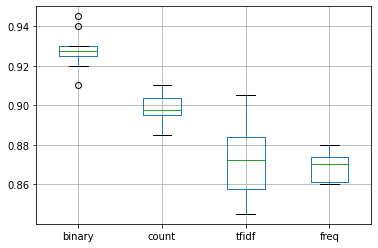

In [17]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']


results = DataFrame()


for mode in modes:
    # prepare data for mode
    Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
    # evaluate model on data for mode
    results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)

# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()


We can see that the mean score of both the count and binary methods appear to be better than freq
and tfidf.

A box and whisker plot of the results is also presented, summarizing the accuracy distributions
per configuration. We can see that binary achieved the best results with a modest spread and
might be the preferred approach for this dataset.